In [64]:
#import the random module
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
from config import weather_api_key
import pandas as pd
import time

url=f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [42]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [43]:
# add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [44]:
#use the tuple() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

78.91899128290888 -166.39369637935468
-9.477561927402448 85.20129509612156
70.92428528504388 81.82039681714355
-42.0876743432775 134.99856567964486
7.106174900018843 -146.8175516924371
-68.23304096886818 129.84221918390818
-44.00635665825396 -16.630209160400227
-75.60463863552503 177.35300776506534
-76.34131267114306 -18.30831240109316
-7.320594013598523 128.67674833307274
69.57185570015827 -49.97807299412722
-50.790191618136 -76.5261332410365
-88.01388462614291 -21.25891045999964
-16.211807075823216 -136.05050752869408
-62.20052745943382 -60.828006436896146
-23.100080322287482 58.853494626808896
1.4154088244150813 -47.03809063972494
44.16568149804132 -15.59164426574398
1.4823871459882412 -26.46838024059568
45.909954517796564 -166.1891289071243
36.695415533509646 8.673918982856264
45.83189560179949 -117.3780259813417
59.21997796884696 152.26769814590415
-83.6752977441281 -100.20297107937895
-68.1275615862962 165.27837654706497
88.87795797519411 116.87647973543994
89.93366301174817 154.

-38.77770725548394 -35.01327759818207
-36.383697713107814 -74.92312701521693
10.0694814855121 173.2082397152081
-69.63010735052842 -107.81356140187826
16.00152810082247 -108.09067826172867
-10.320964938905277 41.33839604603071
-8.764644537148499 -163.3647927157342
16.894831237569676 82.03873154700335
39.20760882876735 112.17200655546765
55.68998561544453 67.05888722920497
-39.183409202597765 -168.75704328668115
21.35366654959286 107.89666918547874
28.52673675018727 179.37508888183822
79.50805637871878 -31.248004139651414
-22.721926126244043 -23.356145236574662
82.86826270980268 29.194115600557012
14.07623590136349 -164.88182787788057
-27.199113575473113 56.5113353471686
31.704514582719 62.056837407451326
43.92866791079206 135.48002166867246
-12.039900188367525 78.96730888845178
-28.854541354320908 -164.3505444895693
-23.738198826992985 -86.02750904333851
14.150145458866291 -133.96290295224742
-64.64408638165685 138.5210621123304
11.766284030465187 -51.58229418444253
-27.618340947192195

In [45]:
#use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [46]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

barrow us
hithadhoo mv
karaul ru
mount gambier au
hilo us
new norfolk au
jamestown sh
kaitangata nz
ushuaia ar
ambon id
ilulissat gl
punta arenas cl
ushuaia ar
rikitea pf
ushuaia ar
souillac mu
salinopolis br
muros es
touros br
bethel us
jundubah tn
lewiston us
ola ru
punta arenas cl
bluff nz
saskylakh ru
chokurdakh ru
nabire id
warqla dz
castro cl
meyungs pw
khormuj ir
juba sd
bambous virieux mu
karratha au
taolanaro mg
wah pk
iqaluit ca
ilulissat gl
makambako tz
cape town za
attawapiskat ca
geraldton au
ribeira grande pt
cape town za
albany au
cape town za
ushuaia ar
bolungarvik is
jamestown sh
lebu cl
hirara jp
busselton au
vesoul fr
jamestown sh
ushuaia ar
bilibino ru
castro cl
the valley ai
jamestown sh
kapaa us
kapaa us
mar del plata ar
kruisfontein za
san quintin mx
bambous virieux mu
ugoofaaru mv
mataura pf
shenjiamen cn
masvingo zw
new norfolk au
tumannyy ru
salinas ec
qaanaaq gl
hithadhoo mv
avarua ck
puerto ayora ec
olafsvik is
severo-kurilsk ru
santa isabel do rio negro br


puerto ayora ec
rikitea pf
micheweni tz
port elizabeth za
kimbe pg
hailar cn
sentyabrskiy ru
owase jp
atuona pf
solnechnyy ru
jamestown sh
east london za
arraial do cabo br
rikitea pf
richards bay za
qaanaaq gl
mahebourg mu
menongue ao
albany au
portland au
medina br
mnogovershinnyy ru
avarua ck
orzu tj
hithadhoo mv
raduzhnyy ru
airai pw
nikolskoye ru
carnarvon au
umzimvubu za
boli cn
nome us
charters towers au
butaritari ki
point pleasant us
barentsburg sj
yulara au
upernavik gl
barrow us
rungata ki
iqaluit ca
bluff nz
bambous virieux mu
belushya guba ru
samarai pg
ushuaia ar
castro cl
east london za
rikitea pf
albany au
fort nelson ca
east london za
salalah om
tidore id
bengkulu id
ushuaia ar
carutapera br
darhan mn
souillac mu
hobart au
kodiak us
ancud cl
tsihombe mg
saskylakh ru
vaini to
flers fr
cherskiy ru
mataura pf
hobart au
constantine dz
airai pw
provideniya ru
kalengwa zm
santa helena de goias br
arraial do cabo br
avera pf
vaitupu wf
acapulco mx
tyubuk ru
cidreira br
mahebo

albany au
upernavik gl
davila ph
cape town za
hasaki jp
kalmunai lk
souillac mu
muzhi ru
esperance au
victoria sc
kingaroy au
cairns au
lolua tv
castro cl
port-gentil ga
karaul ru
new norfolk au
hobart au
sentyabrskiy ru
vestmannaeyjar is
dikson ru
kapaa us
mys shmidta ru
amderma ru
vila franca do campo pt
whitehorse ca
punta arenas cl
chuy uy
cherskiy ru
hithadhoo mv
whitehorse ca
carnarvon au
taolanaro mg
albany au
rikitea pf
atuona pf
upernavik gl
bluff nz
kapaa us
ushuaia ar
nanortalik gl
ushuaia ar
meulaboh id
goderich sl
saint-philippe re
yellowknife ca
talcahuano cl
leh in
burnie au
bluff nz
miri my
leningradskiy ru
amahai id
vao nc
georgetown sh
suleja ng
sargatskoye ru
cape town za
ribeira grande pt
sechura pe
sinnamary gf
moussoro td
vostok ru
ushuaia ar
port alfred za
bambous virieux mu
saint-philippe re
taolanaro mg
castro cl
bredasdorp za
mildura au
nikolskoye ru
hilo us
tumannyy ru
hermanus za
oranjemund na
yellowknife ca
kapaa us
busselton au
bor tr
quatre cocos mu
matau

In [47]:
#creawt a list for holding the cities.
cities = []
#identify the enarest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
            cities.append(city)
#print the city count to confirm sufficient count
len(cities)

599

In [48]:
cities

['barrow',
 'hithadhoo',
 'karaul',
 'mount gambier',
 'hilo',
 'new norfolk',
 'jamestown',
 'kaitangata',
 'ushuaia',
 'ambon',
 'ilulissat',
 'punta arenas',
 'rikitea',
 'souillac',
 'salinopolis',
 'muros',
 'touros',
 'bethel',
 'jundubah',
 'lewiston',
 'ola',
 'bluff',
 'saskylakh',
 'chokurdakh',
 'nabire',
 'warqla',
 'castro',
 'meyungs',
 'khormuj',
 'juba',
 'bambous virieux',
 'karratha',
 'taolanaro',
 'wah',
 'iqaluit',
 'makambako',
 'cape town',
 'attawapiskat',
 'geraldton',
 'ribeira grande',
 'albany',
 'bolungarvik',
 'lebu',
 'hirara',
 'busselton',
 'vesoul',
 'bilibino',
 'the valley',
 'kapaa',
 'mar del plata',
 'kruisfontein',
 'san quintin',
 'ugoofaaru',
 'mataura',
 'shenjiamen',
 'masvingo',
 'tumannyy',
 'salinas',
 'qaanaaq',
 'avarua',
 'puerto ayora',
 'olafsvik',
 'severo-kurilsk',
 'santa isabel do rio negro',
 'mys shmidta',
 'sinnamary',
 'seoul',
 'svetlyy',
 'cherskiy',
 'leningradskiy',
 'vao',
 'college',
 'saint george',
 'malchin',
 'sredne

In [49]:
#import the datetime module from the datetime library
from datetime import datetime

In [50]:
#create an empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval    
----------------------------


In [51]:
#loop throguh all the cities in our list
for i in range(len(cities)):
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count =1
    #creat endpoint URL with each city
    city_url = "{url}&q={cities[i]}"

In [52]:
#loop throguh all the cities in our list
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for loggin purposes
    if (i % 50 == 0 and i>=50):
        set_count +=1
        record_count =1
    #creat endpoint URL with each city
    city_url = url + "&q=" + city
    
    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count +=1
 # Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 12 | barrow
Processing Record 2 of Set 12 | hithadhoo
Processing Record 3 of Set 12 | karaul
City not found. Skipping...
Processing Record 4 of Set 12 | mount gambier
Processing Record 5 of Set 12 | hilo
Processing Record 6 of Set 12 | new norfolk
Processing Record 7 of Set 12 | jamestown
Processing Record 8 of Set 12 | kaitangata
Processing Record 9 of Set 12 | ushuaia
Processing Record 10 of Set 12 | ambon
Processing Record 11 of Set 12 | ilulissat
Processing Record 12 of Set 12 | punta arenas
Processing Record 13 of Set 12 | rikitea
Processing Record 14 of Set 12 | souillac
Processing Record 15 of Set 12 | salinopolis
Processing Record 16 of Set 12 | muros
Processing Record 17 of Set 12 | touros
Processing Record 18 of Set 12 | bethel
Processing Record 19 of Set 12 | jundubah
City not found. Skipping...
Processing Record 20 of Set 12 | lewiston
Processing Record 21 of Set 12 | ola
Processing Record 22 of Set 12 | bluff
Processing Record 23 of Set 12 | sask

Processing Record 32 of Set 15 | stoyba
City not found. Skipping...
Processing Record 33 of Set 15 | baisha
Processing Record 34 of Set 15 | georgetown
Processing Record 35 of Set 15 | luang prabang
Processing Record 36 of Set 15 | poso
Processing Record 37 of Set 15 | zdvinsk
Processing Record 38 of Set 15 | butaritari
Processing Record 39 of Set 15 | isangel
Processing Record 40 of Set 15 | vila velha
Processing Record 41 of Set 15 | marcona
City not found. Skipping...
Processing Record 42 of Set 15 | okato
Processing Record 43 of Set 15 | abengourou
Processing Record 44 of Set 15 | yulara
Processing Record 45 of Set 15 | longyearbyen
Processing Record 46 of Set 15 | paracuru
Processing Record 47 of Set 15 | umzimvubu
City not found. Skipping...
Processing Record 48 of Set 15 | bone
Processing Record 49 of Set 15 | los llanos de aridane
Processing Record 50 of Set 15 | marsa matruh
Processing Record 1 of Set 16 | douentza
Processing Record 2 of Set 16 | puqi
Processing Record 3 of Se

Processing Record 22 of Set 19 | rungata
City not found. Skipping...
Processing Record 23 of Set 19 | samarai
Processing Record 24 of Set 19 | fort nelson
Processing Record 25 of Set 19 | salalah
Processing Record 26 of Set 19 | tidore
City not found. Skipping...
Processing Record 27 of Set 19 | carutapera
Processing Record 28 of Set 19 | darhan
Processing Record 29 of Set 19 | ancud
Processing Record 30 of Set 19 | tsihombe
City not found. Skipping...
Processing Record 31 of Set 19 | flers
Processing Record 32 of Set 19 | constantine
Processing Record 33 of Set 19 | kalengwa
Processing Record 34 of Set 19 | santa helena de goias
Processing Record 35 of Set 19 | avera
Processing Record 36 of Set 19 | acapulco
Processing Record 37 of Set 19 | tyubuk
Processing Record 38 of Set 19 | cidreira
Processing Record 39 of Set 19 | galt
Processing Record 40 of Set 19 | zelenogradskiy
Processing Record 41 of Set 19 | mastic beach
Processing Record 42 of Set 19 | havoysund
Processing Record 43 of 

Processing Record 8 of Set 23 | kavaratti
Processing Record 9 of Set 23 | milicz
Processing Record 10 of Set 23 | qingyuan
Processing Record 11 of Set 23 | terrace bay
Processing Record 12 of Set 23 | dalnerechensk
Processing Record 13 of Set 23 | namibe
Processing Record 14 of Set 23 | abu dhabi
Processing Record 15 of Set 23 | sobradinho
Processing Record 16 of Set 23 | sumenep
Processing Record 17 of Set 23 | meulaboh
Processing Record 18 of Set 23 | lumberton
Processing Record 19 of Set 23 | qurayyat
Processing Record 20 of Set 23 | umea
Processing Record 21 of Set 23 | karema
Processing Record 22 of Set 23 | el alto
Processing Record 23 of Set 23 | mandera
Processing Record 24 of Set 23 | stornoway
Processing Record 25 of Set 23 | jarjis
City not found. Skipping...
Processing Record 26 of Set 23 | albanel
Processing Record 27 of Set 23 | saurimo
Processing Record 28 of Set 23 | elburg
Processing Record 29 of Set 23 | prince rupert
Processing Record 30 of Set 23 | kandrian
Processi

In [53]:
len(city_data)

551

In [59]:
city_data_dfs = pd.DataFrame(city_data)
city_data_dfs.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,24.82,86,90,12.66,US,2021-10-05 21:11:26
1,Hithadhoo,-0.6000,73.0833,83.35,76,92,16.96,MV,2021-10-05 21:11:26
2,Mount Gambier,-37.8333,140.7667,42.53,92,49,6.71,AU,2021-10-05 21:11:50
3,Hilo,19.7297,-155.0900,80.80,75,20,8.05,US,2021-10-05 21:10:05
4,New Norfolk,-42.7826,147.0587,49.50,46,98,3.42,AU,2021-10-05 21:11:31


In [57]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [60]:
city_data_df = city_data_dfs[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2021-10-05 21:11:26,71.2906,-156.7887,24.82,86,90,12.66
1,Hithadhoo,MV,2021-10-05 21:11:26,-0.6000,73.0833,83.35,76,92,16.96
2,Mount Gambier,AU,2021-10-05 21:11:50,-37.8333,140.7667,42.53,92,49,6.71
3,Hilo,US,2021-10-05 21:10:05,19.7297,-155.0900,80.80,75,20,8.05
4,New Norfolk,AU,2021-10-05 21:11:31,-42.7826,147.0587,49.50,46,98,3.42


In [61]:
#creat the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [62]:
#extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

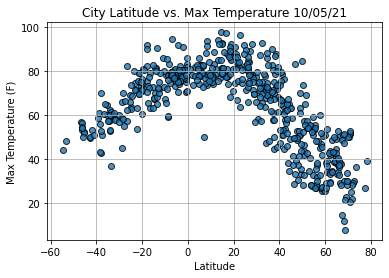

In [66]:
#build the scatterplot for latitude vs max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")
plt.show()

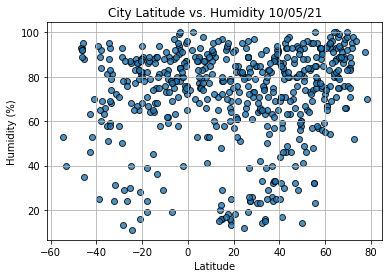

In [67]:
#build the scatterplot for latitude vs humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")
plt.show()

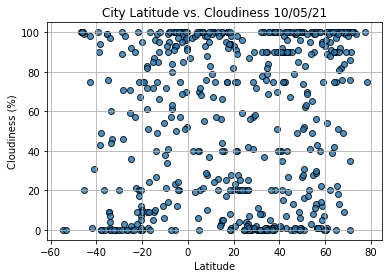

In [69]:
#build the scatterplot for latitude vs cloudines
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")
plt.show()

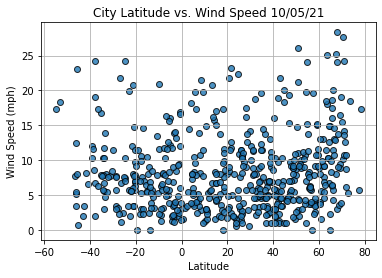

In [70]:
#build the scatterplot for latitude vs wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")
plt.show()